In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix 



C:\Users\ramsp\AppData\Local\Temp\ipykernel_8228\1365459664.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True)


Actual value  Predicted value
185              1                1
2715             0                0
3825             0                0
1807             1                1
132              0                0
...            ...              ...
6366             0                0
315              0                0
2439             0                0
5002             0                0
1161             1                0

[1409 rows x 2 columns]

In [59]:
employee = pd.read_csv("Churn.csv") 
employee.head() 

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [75]:
employee = employee.drop(['customerID'],axis=1) 
employee.columns
employee['TotalCharges'] =employee["TotalCharges"].replace(" ",np.nan).astype(float)  
employee.isna().sum() 
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True)

C:\Users\ramsp\AppData\Local\Temp\ipykernel_8228\1890683186.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True)


In [76]:
employee['Churn'] = employee['Churn'].map({'No':1,'Yes':0})
emp_encoded = pd.get_dummies(employee,drop_first=True)

In [77]:
x = emp_encoded.drop(columns=['Churn'],axis=1)
y = emp_encoded['Churn']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [79]:
model = RandomForestClassifier()

In [80]:
model.fit(x_train,y_train)

ValueError: Input y contains NaN.

[[943  93]
 [200 173]]


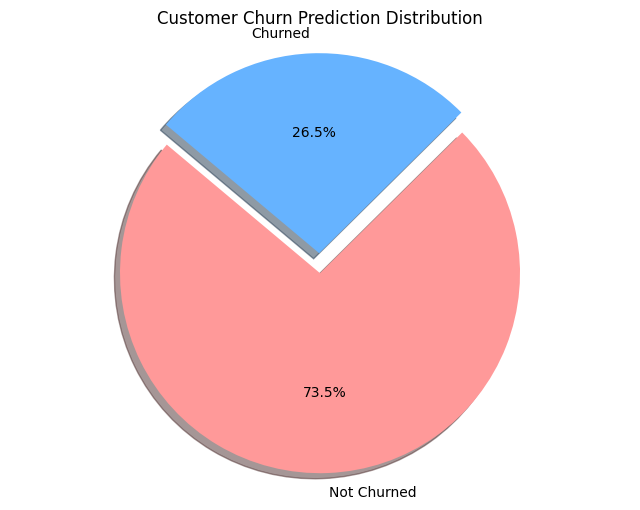

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred) 
print(conf_matrix) 
 
labels = ['Not Churned', 'Churned'] 
sizes = [conf_matrix[0, 0] + conf_matrix[0, 1], conf_matrix[1, 0] + conf_matrix[1, 1]] 
colors = ['#ff9999','#66b3ff'] 
explode = (0.1, 0) 
plt.figure(figsize=(8, 6)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
shadow=True, startangle=140) 
plt.title('Customer Churn Prediction Distribution') 
plt.axis('equal') 
plt.show()